# Prosper Loan Dataset Exploration
## by Ahmed Gharib

## Introduction
#### About Prosper

From the [Prosper](https://www.prosper.com/) website. Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than $17 billion in loans to more than 1,030,000 people.

Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between \\$2,000 and \\$40,000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

Prosper Marketplace is backed by leading investors including Sequoia Capital, Francisco Partners, Institutional Venture Partners, and Credit Suisse NEXT Fund.

### Table of Content
- [Preliminary Wrangling](#Wrangling)
- [Univariate Exploration](#UnivariateExploration)
- [Bivariate Exploration](#Bivariate)
- [Multivariate Exploration](#Multivariate)

<a id='Wrangling'></a>
## Preliminary Wrangling

[Prosper Loan Dataset](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1602316069250000&usg=AOvVaw3v_Fjzy60OI_JxN1zu63ds) (Last update 03/11/2014)

- This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

- [This data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1602316069252000&usg=AOvVaw30T5Cb1SJcH_-mM-PE6sWH) explains the variables in the data set.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Setting up the general theme of charts and color palette to use
sns.set_theme(style='white', palette='Set2')
base_color = '#00334e'

# To display charts in the same notebook
%matplotlib inline

# Pandas diplay options
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
# First let's start by reading the data dictionary to understand each column of the data 
data_dict = pd.read_excel('data/Prosper Loan Data - Variable Definitions.xlsx')
data_dict

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the..."
1,ListingNumber,The number that uniquely identifies the listin...
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the tim...
4,Term,The length of the loan expressed in months.
5,LoanStatus,"The current status of the loan: Cancelled, Ch..."
6,ClosedDate,"Closed date is applicable for Cancelled, Compl..."
7,BorrowerAPR,The Borrower's Annual Percentage Rate (APR) fo...
8,BorrowerRate,The Borrower's interest rate for this loan.
9,LenderYield,The Lender yield on the loan. Lender yield is ...


In [3]:
# Loading the dataset and parsing the dates columns
date_columns = ['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate']
loan = pd.read_csv('data/prosperLoanData.csv', parse_dates=date_columns)

In [4]:
# Display the shape of the data
loan.shape

(113937, 81)

In [5]:
# Display dataset summary statistics
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ListingNumber,113937.00000,627885.69251,328076.23639,4.00000,400919.00000,600554.00000,892634.00000,1255725.00000
Term,113937.00000,40.83025,10.43621,12.00000,36.00000,36.00000,36.00000,60.00000
BorrowerAPR,113912.00000,0.21883,0.08036,0.00653,0.15629,0.20976,0.28381,0.51229
BorrowerRate,113937.00000,0.19276,0.07482,0.00000,0.13400,0.18400,0.25000,0.49750
LenderYield,113937.00000,0.18270,0.07452,-0.01000,0.12420,0.17300,0.24000,0.49250
EstimatedEffectiveYield,84853.00000,0.16866,0.06847,-0.18270,0.11567,0.16150,0.22430,0.31990
EstimatedLoss,84853.00000,0.08031,0.04676,0.00490,0.04240,0.07240,0.11200,0.36600
EstimatedReturn,84853.00000,0.09607,0.03040,-0.18270,0.07408,0.09170,0.11660,0.28370
ProsperRating (numeric),84853.00000,4.07224,1.67323,1.00000,3.00000,4.00000,5.00000,7.00000
ProsperScore,84853.00000,5.95007,2.37650,1.00000,4.00000,6.00000,8.00000,11.00000


In [6]:
# Disply df info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [7]:
# Display the number of unique values for the string columns
loan.select_dtypes(include=['object']).nunique()

ListingKey                113066
CreditGrade                    8
LoanStatus                    12
ProsperRating (Alpha)          7
BorrowerState                 51
Occupation                    67
EmploymentStatus               8
GroupKey                     706
IncomeRange                    8
LoanKey                   113066
LoanOriginationQuarter        33
MemberKey                  90831
dtype: int64

In [8]:
# Display any duplicated values if any and the number of duplicates
print(f'number of duplicated rows: {loan[loan.duplicated()].shape[0]}')
loan[loan.duplicated()]

number of duplicated rows: 0


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [9]:
# Number of loans for every year
loan.ListingCreationDate.dt.year.value_counts()

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: ListingCreationDate, dtype: int64

In [10]:
# Display the IncomeRange Value Counts
loan.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [11]:
# Display Term Value Counts
loan.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [12]:
# Display EmployementStatus Value Counts
loan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [13]:
# Display ProsperScore Value Counts
loan.ProsperScore.value_counts().sort_index()

1.00000       992
2.00000      5766
3.00000      7642
4.00000     12595
5.00000      9813
6.00000     12278
7.00000     10597
8.00000     12053
9.00000      6911
10.00000     4750
11.00000     1456
Name: ProsperScore, dtype: int64

In [14]:
# Display a sample from where ProsperScore 11
loan[loan.ProsperScore == 11].sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
42512,3A2735982339471140848F6,1101939,2013-12-20 20:37:02.357,NaN,36,Current,NaT,0.13799,0.10990,0.09990,0.09628,0.03240,0.06388,6.00000,A,11.00000,1,OH,NaN,Other,0.00000,False,False,NaN,2013-12-20 20:37:05,760.00000,779.00000,1974-07-31,39.00000,38.00000,66.00000,35,1027.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,31881.00000,0.14000,178850.00000,61.00000,1.00000,2.00000,0.48000,"$50,000-74,999",True,5833.33333,44163704081628028190A6F,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,2,128015,15000,2014-01-22,Q1 2014,31D53701491024121365633,491.01000,486.49360,351.00000,135.49360,-12.74000,0.00000,0.00000,0.00000,0.00000,1.00000,0,0,0.00000,1
102347,7938360278504065342B978,1220981,2014-03-02 08:07:37.543,NaN,36,Current,NaT,0.06726,0.06050,0.05050,0.05000,0.00740,0.04260,7.00000,AA,11.00000,2,IL,Other,Other,153.00000,True,False,NaN,2014-03-02 08:07:40,840.00000,859.00000,2000-09-13,13.00000,11.00000,21.00000,10,165.00000,0.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,479.00000,0.00000,68621.00000,21.00000,1.00000,0.00000,0.05000,"$50,000-74,999",True,5000.00000,0F0E37070088526258CF5C8,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,0,134621,2000,2014-03-05,Q1 2014,C0E43496482111807E00B76,60.89000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0,0,0.00000,1
93653,91293600145451568DB2075,1118520,2014-01-06 14:33:53.783,NaN,36,Current,NaT,0.06726,0.06050,0.05050,0.05000,0.00740,0.04260,7.00000,AA,11.00000,1,CA,Computer Programmer,Employed,145.00000,True,False,NaN,2014-01-06 14:33:56,760.00000,779.00000,2000-06-27,15.00000,13.00000,45.00000,11,372.00000,1.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,39225.00000,0.33000,75690.00000,41.00000,1.00000,1.00000,0.14000,"$100,000+",True,10000.00000,155737037026455835D77F8,1.00000,21.00000,21.00000,0.00000,0.00000,10000.00000,0.00000,nan,0,nan,2,126007,13000,2014-01-09,Q1 2014,891D3478700856198485A32,395.78000,395.78000,328.98000,66.80000,-11.04000,0.00000,0.00000,0.00000,0.00000,1.00000,0,0,0.00000,234
7109,09D63593410168400FB7F06,1029414,2013-11-08 23:25:06.790,NaN,36,Current,NaT,0.06726,0.06050,0.05050,0.05001,0.00740,0.04261,7.00000,AA,11.00000,1,CA,Computer Programmer,Employed,34.00000,True,False,NaN,2013-11-08 23:25:10,780.00000,799.00000,1997-11-13,11.00000,11.00000,29.00000,9,541.00000,0.00000,4.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12775.00000,0.19000,51625.000

In [15]:
# Missing values from LoanStatus or BorrowerAPR
loan[['BorrowerAPR', 'LoanStatus']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   BorrowerAPR  113912 non-null  float64
 1   LoanStatus   113937 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


In [16]:
# Display the rows without APR rate
loan[loan['BorrowerAPR'].isnull()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
2543,044B3365298516680DA929B,36,2005-11-28 22:42:42.557,HR,36,Completed,2006-01-06,nan,0.10000,0.09500,nan,nan,nan,nan,NaN,nan,0,NaN,NaN,NaN,nan,False,False,5BE63365249159793785758,2005-11-28 22:42:42.557,nan,nan,NaT,nan,nan,nan,0,0.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.02685,Not displayed,True,8333.33333,C1C4336516803221710615B,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,99,19,4200,2005-12-12,Q4 2005,10983364491040266AF6111,99.40000,4227.03000,4200.00000,27.03000,-4.02000,0.00000,0.00000,0.00000,0.00000,1.00000,0,0,0.00000,5
14632,E4103364750435927B6F892,67,2006-01-06 12:54:51.887,AA,36,Completed,2006-04-10,nan,0.06500,0.05500,nan,nan,nan,nan,NaN,nan,0,NaN,NaN,NaN,nan,False,False,ACFB3365095848727895936,2006-01-06 12:54:51.887,nan,nan,NaT,nan,nan,nan,0,0.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.09031,Not displayed,True,4166.66667,191C3365353954529711DE0,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,98,24,2620,2006-01-10,Q1 2006,12C53364471219226F478E8,80.30000,2657.72000,2620.00000,37.72000,-2.59000,0.00000,0.00000,0.00000,0.00000,1.00000,0,0,0.00000,5
25166,B3083364738592238DBDA63,6,2005-11-15 16:06:47.457,AA,36,Completed,2005-11-29,nan,0.04350,0.03850,nan,nan,nan,nan,NaN,nan,0,NaN,NaN,NaN,nan,False,False,NaN,2005-11-15 16:06:47.457,nan,nan,NaT,nan,nan,nan,0,0.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.04120,Not displayed,True,9166.66667,C29A3366376042420E5D6F4,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,100,5,1000,2005-11-23,Q4 2005,92263365124033374675E8D,29.68000,1000.72000,1000.00000,0.72000,-0.42000,0.00000,0.00000,0.00000,0.00000,1.00000,0,0,0.00000,3
25330,B6C33364979883097BBCD77,39,2005-11-29 13:29:16.810,AA,36,Completed,2006-03-21,nan,0.06395,0.05520,nan,nan,nan,nan,NaN,nan,0,NaN,NaN,NaN,nan,False,False,BA973366260114148BF757A,2005-11-29 09:42:00.007,nan,nan,NaT,nan,nan,nan,0,0.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.07707,Not displayed,True,7083.33333,A5A53366276781033D5C4FF,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,99,18,1500,2005-12-08,Q4 2005,D3213365072473957A40CF8,45.90000,1519.59000,1500.00000,19.59000,-1.30000,0.00000,0.00000,0.00000,0.00000,1.00000,0,0,0.00000,4
29773,3480336511078238810A782,21,2005-11-18 14:48:19.753,AA,36,Completed,2008-06-05,nan,0.06000,0.05500,nan,nan,nan,nan,NaN,nan,0,NaN,NaN,NaN,nan,False,False,94E9336577086235891524E,2005-11-18 14:48:19.753,nan,nan,NaT,nan,n

### What is the structure of your dataset?

There are 113,937 observations for prosper loans with 81 features most features are numeric in type (61) float64(50), int64(11), bool(3), datetime64\[ns](5),  object(12)

### What is/are the main feature(s) of interest in your dataset?

Mainly interested in 2 features BorrowerAPR and LoanStatus to help me answer the following questions:
- What factors affect a loan’s outcome status?
- What affects the borrower’s APR or interest rate? 
- Are there differences between loans depending on how large the original loan amount was?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


|Variable|Description|
|---|---|
|ListingCreationDate|	The date the listing was created|
|Term|	The length of the loan expressed in months|
|LoanStatus|	The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket|
|BorrowerAPR|	The Borrower's Annual Percentage Rate (APR) for the loan|
|ProsperScore|	A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009|
|ListingCategory|	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans|
|BorrowerState|	The two letter abbreviation of the state of the address of the borrower at the time the Listing was created|
|Occupation|	The Occupation selected by the Borrower at the time they created the listing|
|EmploymentStatus|	The employment status of the borrower at the time they posted the listing|
|EmploymentStatusDuration|	The length in months of the employment status at the time the listing was created|
|IsBorrowerHomeowner|	A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner|
|CreditScoreRangeLower|	The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency|
|CreditScoreRangeUpper|	The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency|
|IncomeRange|	The income range of the borrower at the time the listing was created|
|OnTimeProsperPayments|	Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans|
|LoanCurrentDaysDelinquent|	The number of days delinquent|
|LoanOriginalAmount|	The origination amount of the loan|


Before I close this section let's do some data cleaning 
- Chose a subset of the data to work with to include just the columns of intrest.
- Rename ListingCategory (numeric) column to ListingCategory.
- Replace the numbers of ListingCategory to Categories.
- Convert the categorical columns into categorical dtype .
- Drop rows with missing APR values.
- Drop data from 2005 and 2014 as they are not complete.
- Create new column for average Credit Score Range and drop the 2 columns for lower and upper bounds.

In [165]:
# List of columns to use with the features of intrest
use_cols = ['ListingCreationDate',
            'Term',
            'LoanStatus', 
            'BorrowerAPR',
            'ProsperScore', 
            'ListingCategory (numeric)', 
            'BorrowerState', 
            'Occupation', 
            'EmploymentStatus', 
            'EmploymentStatusDuration', 
            'IsBorrowerHomeowner', 
            'CreditScoreRangeLower', 
            'CreditScoreRangeUpper', 
            'IncomeRange', 
            'OnTimeProsperPayments', 
            'LoanCurrentDaysDelinquent', 
            'LoanOriginalAmount']

In [166]:
# Copy of the data frame to clean it
loan_clean = loan.copy()

# Use only the columns of intrest
loan_clean = loan_clean[use_cols]

# drop the data of 2005 and 2014
loan_clean = loan_clean.loc[~loan_clean.ListingCreationDate.dt.year.isin([2005, 2014])].reset_index().drop('index', axis=1)

In [167]:
# Drop rows with no APR values
loan_clean = loan_clean.loc[~loan_clean['BorrowerAPR'].isnull()].reset_index().drop('index', axis=1)

In [168]:
# Rename the ProsperRating (Alpha) and ListingCategory (numeric) columns
loan_clean = loan_clean.rename(columns={'ListingCategory (numeric)': 'ListingCategory'})

In [169]:
# Replace the numbers of ListingCategory to Categories
listing_category_dict = {0: 'Not Available',
                         1: 'Debt Consolidation', 
                         2: 'Home Improvement', 
                         3: 'Business', 
                         4: 'Personal Loan', 
                         5: 'Student Use', 
                         6: 'Auto',
                         7: 'Other', 
                         8: 'Baby&Adoption', 
                         9: 'Boat', 
                         10: 'Cosmetic Procedure', 
                         11: 'Engagement Ring', 
                         12: 'Green Loans', 
                         13: 'Household Expenses', 
                         14: 'Large Purchases', 
                         15: 'Medical/Dental', 
                         16: 'Motorcycle', 
                         17: 'RV', 
                         18: 'Taxes', 
                         19: 'Vacation',
                         20: 'Wedding Loans'}

loan_clean.ListingCategory.replace(listing_category_dict, inplace=True)

In [172]:
# Dictionary of ordered categories
cat_dict = {'IncomeRange': ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', 
                            '$1-24,999', '$0', 'Not displayed', 'Not employed'],
            'ProsperScore': [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
            'Term': [60, 36, 12]}

# List of columns to convert
cat_cols = ['EmploymentStatus', 'LoanStatus', 'ListingCategory', 'BorrowerState', 'Occupation']

In [173]:
# Converting ordered categories columns 

for col in cat_dict:
    ordered_cat = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = cat_dict[col])
    loan_clean[col] = loan_clean[col].astype(ordered_cat)

In [174]:
# Converting other categorical clomuns

for col in cat_cols:
    loan_clean[col] = loan_clean[col].astype('category')

In [175]:
loan_clean['AvgCreditScore'] = (loan_clean.CreditScoreRangeLower + loan_clean.CreditScoreRangeUpper) /2
loan_clean.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis=1, inplace=True)

In [176]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103178 entries, 0 to 103177
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        103178 non-null  datetime64[ns]
 1   Term                       103178 non-null  category      
 2   LoanStatus                 103178 non-null  category      
 3   BorrowerAPR                103178 non-null  float64       
 4   ProsperScore               74119 non-null   category      
 5   ListingCategory            103178 non-null  category      
 6   BorrowerState              97688 non-null   category      
 7   Occupation                 100137 non-null  category      
 8   EmploymentStatus           100948 non-null  category      
 9   EmploymentStatusDuration   95578 non-null   float64       
 10  IsBorrowerHomeowner        103178 non-null  bool          
 11  IncomeRange                103178 non-null  category

<a id='UnivariateExploration'></a>
## Univariate Exploration

#### I'll start by looking at the distribution of the main variables of interest: BorrowerApr and LoanStatus.

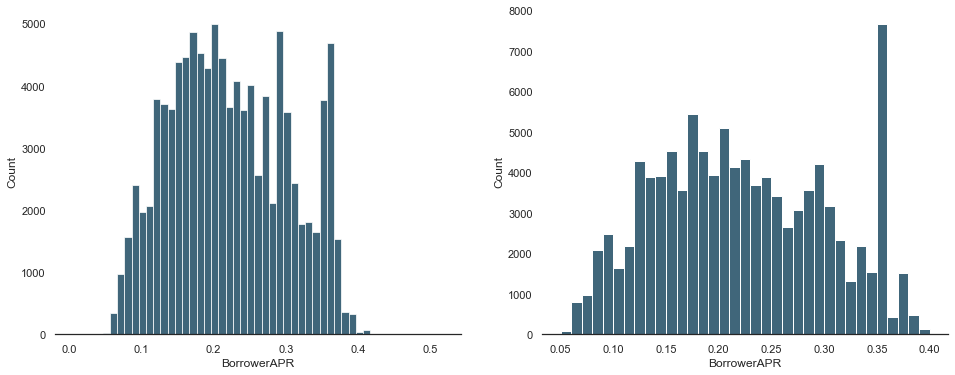

In [177]:
# Ploting the distribution of BorrowerAPR
fig, ax = plt.subplots(figsize=(16, 6), ncols=2)
sns.histplot(loan_clean.BorrowerAPR, kde=False, color=base_color, binwidth=0.01, ax=ax[0])
sns.despine(left=True);

# Zooming from 0.05 to 0.4
sns.histplot(loan_clean.BorrowerAPR, kde=False, color=base_color, binwidth=0.01, ax=ax[1], binrange=[0.05, 0.4])
sns.despine(left=True);

In [178]:
loan_clean.query('BorrowerAPR < 0.01 | BorrowerAPR > 0.45').sort_values('BorrowerAPR')

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,OnTimeProsperPayments,LoanCurrentDaysDelinquent,LoanOriginalAmount,AvgCreditScore
69559,2007-03-24 10:03:30.717,36,Completed,0.00653,NaN,Not Available,MI,Food Service Management,Full-time,152.00000,False,"$1-24,999",nan,0,3000,669.50000
70958,2006-10-18 06:15:54.327,36,Completed,0.00653,NaN,Not Available,NJ,Other,Not available,nan,False,Not displayed,nan,0,5000,609.50000
48447,2006-10-12 06:03:03.183,36,Defaulted,0.00864,NaN,Not Available,PA,Clerical,Not available,nan,False,Not displayed,nan,194,2600,489.50000
16597,2006-03-11 15:43:45.393,36,Defaulted,0.45857,NaN,Not Available,NaN,NaN,NaN,nan,False,Not displayed,nan,257,3000,nan
94136,2006-03-06 22:36:53.753,36,Defaulted,0.45857,NaN,Not Available,NaN,NaN,NaN,nan,False,Not displayed,nan,193,2800,nan
20084,2006-03-12 13:44:15.060,36,Chargedoff,0.46201,NaN,Not Available,NaN,NaN,NaN,nan,False,Not displayed,nan,1970,1789,nan
74263,2006-03-02 19:00:17.593,36,Defaulted,0.48873,NaN,Not Available,NaN,NaN,NaN,nan,False,Not displayed,nan,225,3000,nan
51369,2006-03-16 19:30:16.753,36,Defaulted,0.50633,NaN,Not Available,NaN,NaN,NaN,nan,False,Not displayed,nan,211,3000,nan
32627,2006-02-23 13:57:02.087,36,Completed,0.51229,NaN,Not Available,NaN,NaN,NaN,nan,False,Not displayed,nan,0,1500,nan


In [179]:
loan_clean.BorrowerAPR.describe()

count   103178.00000
mean         0.22260
std          0.08137
min          0.00653
25%          0.15803
50%          0.21470
75%          0.28851
max          0.51229
Name: BorrowerAPR, dtype: float64

#### The distribution of `BorrowerAPR` is approximatly normal with a mean of 22.26%, median of 21.47%, minmun rate of 0.65% and maximum of 51.23%. and most of the values ranges between 10% and 45%.

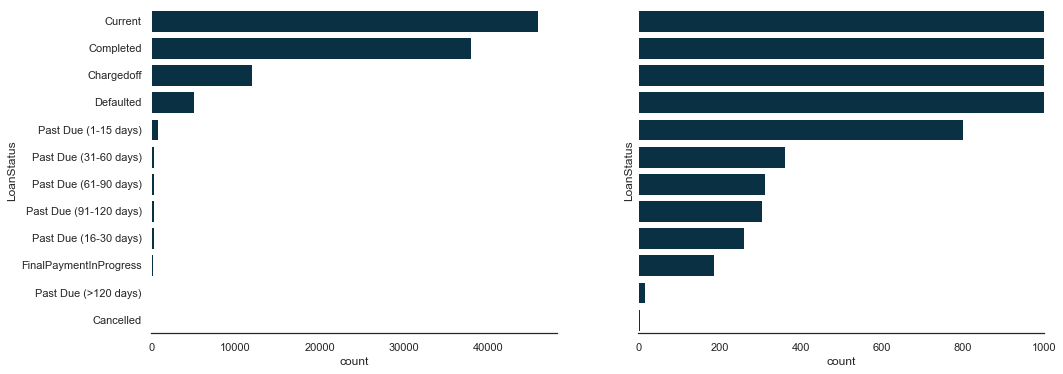

In [209]:
# Ploting the distribution of LoanStatus
LoanStatus_order=loan_clean["LoanStatus"].value_counts().index
fig, ax = plt.subplots(figsize=(16, 6), ncols=2, sharey=True)
sns.countplot(data=loan_clean, y='LoanStatus', color=base_color, ax=ax[0], order=LoanStatus_order)
sns.despine(left=True);

# Zooming for less than 1000
sns.countplot(data=loan_clean, y='LoanStatus', color=base_color, ax=ax[1], order=LoanStatus_order)
sns.despine(left=True)
plt.xlim(0, 1000);

#### `LoanStatus`: The most status is `Current` followd by `completed`, `Chargedoff` and ` Defaulted` and the rest is less than 400 and `Canceled` loans are almost 0. 

### Now Let's take a look for other categorical features distributions

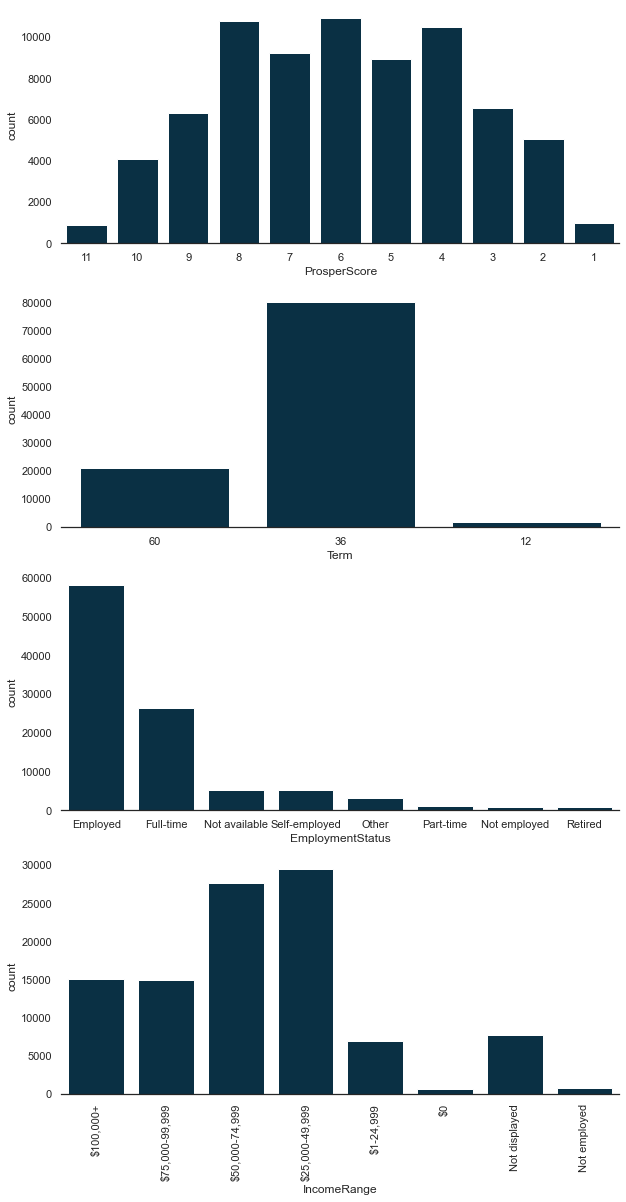

In [182]:
# Listing the columns to plot
cols = ['ProsperScore', 'Term', 'EmploymentStatus', 'IncomeRange']

# Create 5 rows subplots
fig, ax = plt.subplots(figsize=(10, 20), nrows=4)

# Plotting loop
for i, col in enumerate(cols):
    # If the column dtype is ordered category use it`s order if not order by highest value
    if loan_clean[col].cat.ordered:
        order = None
    else:
        order = loan_clean[col].value_counts().index
    
    # Ploting
    sns.countplot(data=loan_clean, x=col, order=order,color=base_color, ax=ax[i])
    sns.despine(left=True)
    
    # If the number of unique values more the 7 turn switch the axis to prevent the ticks from overlapping
    if col == 'IncomeRange':
        plt.xticks(rotation=90)

#### The prosper rating and score distribution is normal, most term used is 36 Months and most of the individuals income range falls between 25,000 and 75,000.

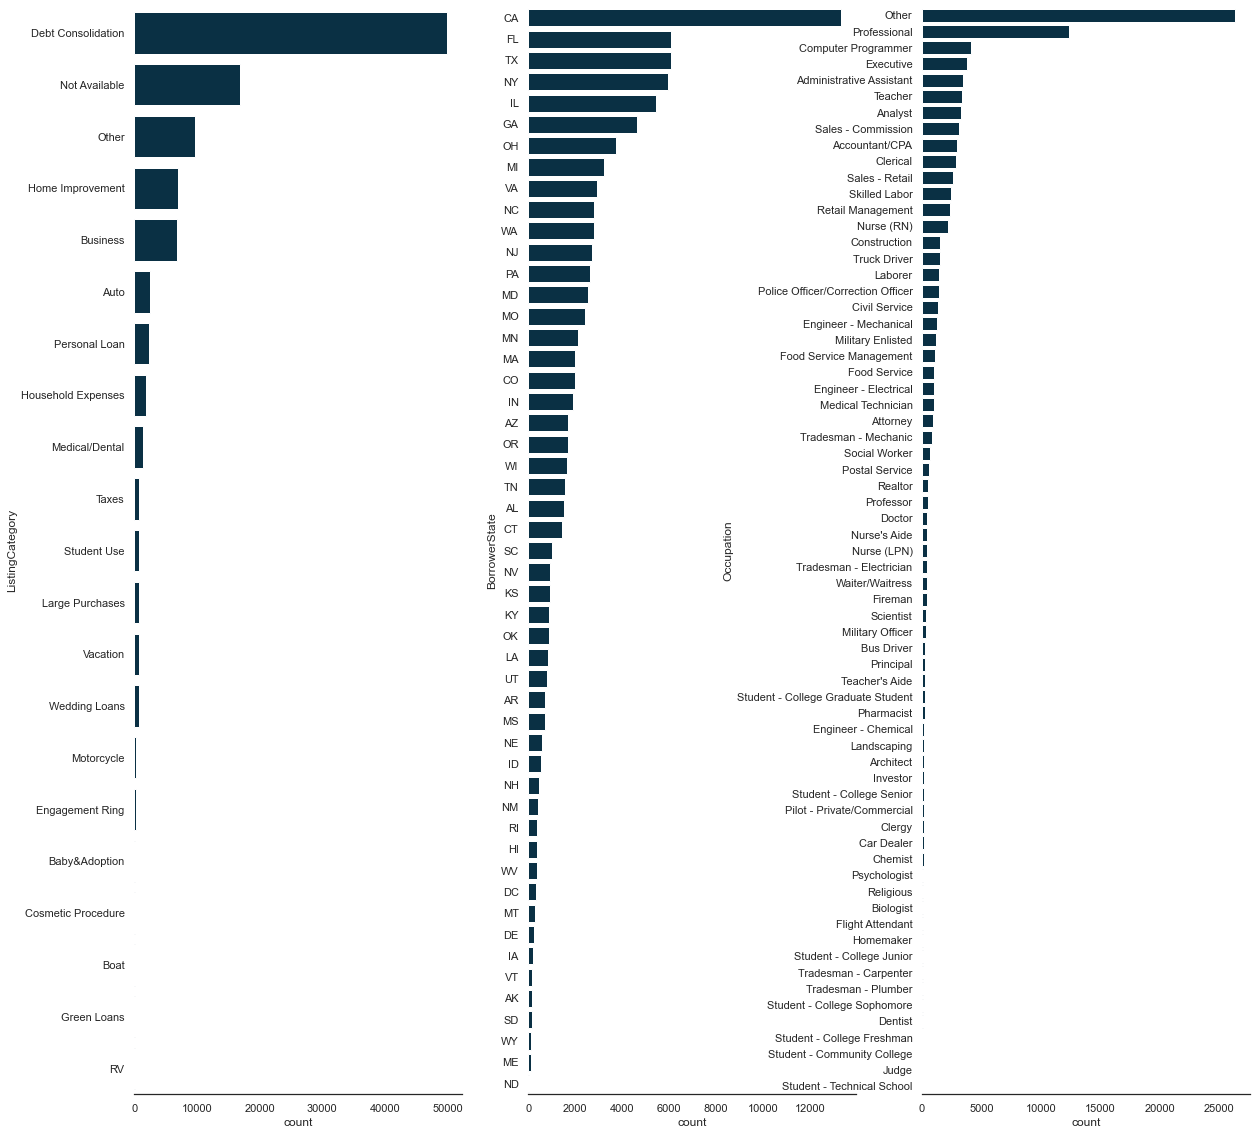

In [183]:
# Listing the columns to plot
cols = ['ListingCategory', 'BorrowerState', 'Occupation']

# Create 3 columns subplots
fig, ax = plt.subplots(figsize=(20, 20), ncols=3)

# Plotting loop
for i, col in enumerate(cols):
    # If the column dtype is ordered category use it`s order if not order by highest value
    if loan_clean[col].cat.ordered:
        order = None
    else:
        order = loan_clean[col].value_counts().index
    
    # Ploting
    sns.countplot(data=loan_clean, y=col, order=order,color=base_color, ax=ax[i])
    sns.despine(left=True)
    

- The top reason for prosper loans is debt consilidation and there is a lot of people didn't reveal for the reason by chosing nothing.
- Most of the Borrower was from California followed by Florida and Texas

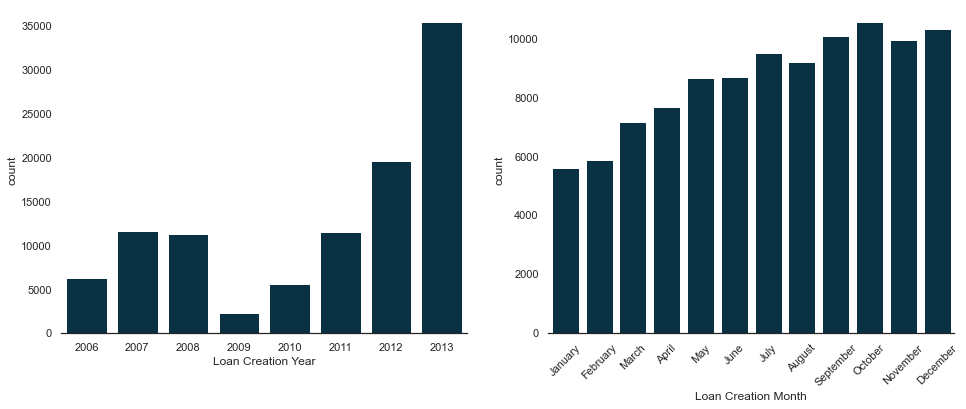

In [184]:
# Creating plots for listing creation data by year and month
fig, ax = plt.subplots(figsize=(16, 6), ncols=2)
g = sns.countplot(x=loan_clean.ListingCreationDate.dt.year, color=base_color, ax=ax[0])
sns.despine(left=True)
g.set(xlabel='Loan Creation Year');

order = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']
g = sns.countplot(x=loan_clean.ListingCreationDate.dt.month_name(), order=order, color=base_color, ax=ax[1])
sns.despine(left=True)
g.set(xlabel='Loan Creation Month')
plt.xticks(rotation=45);

- As we can see here the number loans from 2006 was increasing then dropped in 2009 and started to rise again.
- And people tend to borrow money more in the 2nd half of the year.

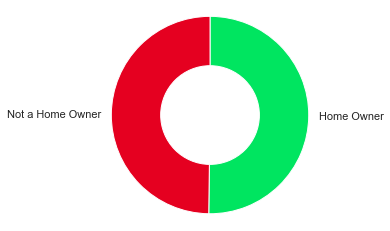

In [185]:
# Preparing for pie plot
isHomeOwner = loan_clean.IsBorrowerHomeowner.value_counts()

# Creating a pie chart for IsBorrowerHomeowner colum
plt.pie(isHomeOwner,
        labels=['Home Owner', 'Not a Home Owner'],
        startangle=90,
        counterclock=False,
        wedgeprops = {'width' : 0.5},
        colors=['#00e560', '#e50020'])
plt.axis('square');

- Nothing intersted here almost 50% of individuals is home owners and the other 50% not.

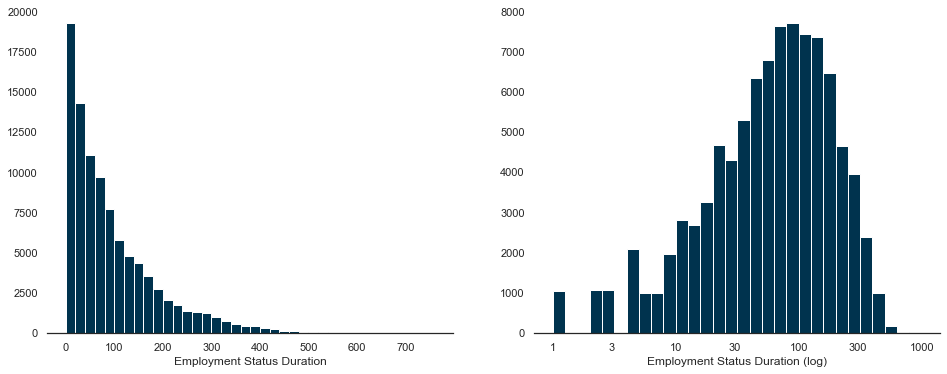

In [186]:
# Ploting the distribution of EmploymentStatusDuration
binsize = 20
bins = np.arange(0, loan_clean.EmploymentStatusDuration.max()+binsize, binsize)
fig, ax = plt.subplots(figsize=(16, 6), ncols=2)
ax[0].hist(loan_clean.EmploymentStatusDuration, color=base_color, bins=bins)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xlabel('Employment Status Duration');

# Ploting the log of EmploymentStatusDuration
log_bins = 10 ** np.arange(0, 3.0+0.1, 0.1)
ticks = [ 1, 3, 10, 30, 100, 300, 1000]
ax[1].hist(loan_clean.EmploymentStatusDuration, color=base_color, bins=log_bins)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xscale('log')
ax[1].set_xticks(ticks)
ax[1].set_xticklabels(ticks)
ax[1].set_xlabel('Employment Status Duration (log)');

- Employment Status Duration has a long-tailed distribution with a lot of emplyees between $0 \to 100$ months in their current position<br> when plotted the log-scale, the distribution is roughly normal with a peak around $80 \to 90$ months.

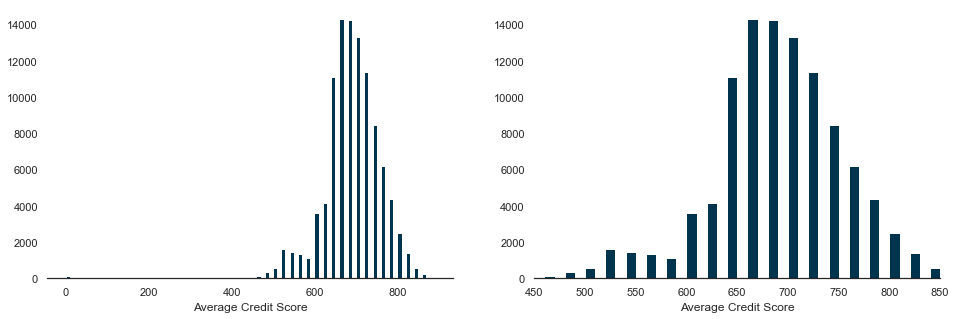

In [187]:
# Ploting Credit score ranges lower and upper
binsize = 10
bins = np.arange(0, loan_clean.AvgCreditScore.max()+binsize, binsize)
# Create a 1x2 Plot
fig, ax = plt.subplots(figsize=(16, 5), ncols=2)

# Ploting AvgCreditScore
ax[0].hist(loan_clean.AvgCreditScore, color=base_color, bins=bins)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xlabel('Average Credit Score');

# Ploting AvgCreditScore
ax[1].hist(loan_clean.AvgCreditScore, color=base_color, bins=bins)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xlabel('Average Credit Score')
ax[1].set(xlim=[450, 850]);

- The distribution of average credit score ranges from about $450 \to 850$ and it's roughly normal with a peak around $670 \text{ and } 690$

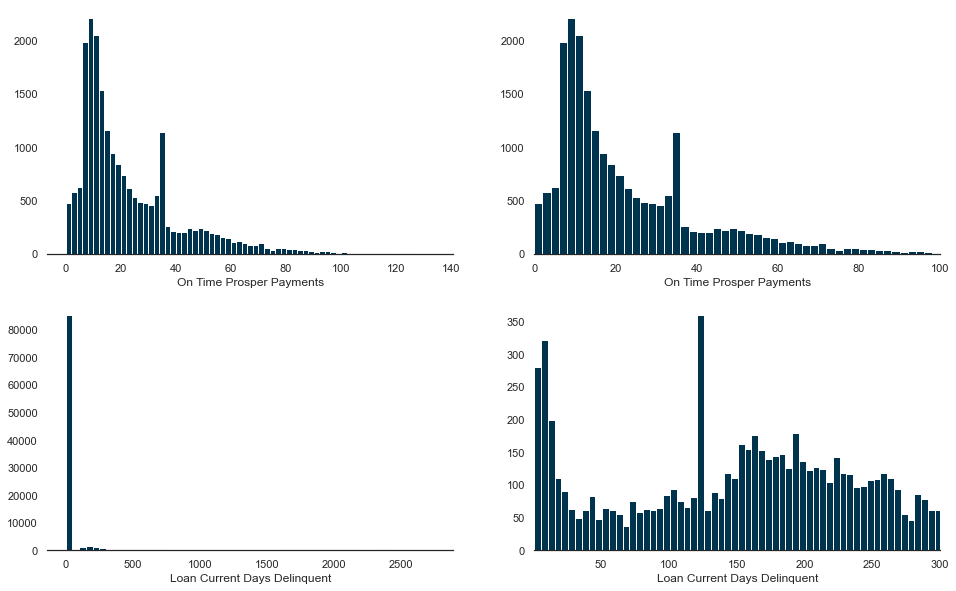

In [188]:
# Ploting Credit score ranges lower and upper
binsize_ontime = 2
bins_ontime = np.arange(0, loan_clean.OnTimeProsperPayments.max()+binsize_ontime, binsize_ontime)
# Create a 2x2 Plot
fig, ax = plt.subplots(figsize=(16, 10), ncols=2, nrows=2)
# Flatten the axis numpy array into 1D numpy array
ax = ax.flatten()

# Ploting CreditScoreRangeLower
ax[0].hist(loan_clean.OnTimeProsperPayments, color=base_color, bins=bins_ontime)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].set_xlabel('On Time Prosper Payments');


# Ploting OnTimeProsperPayments Zoomed in range from 0 to 100
ax[1].hist(loan_clean.OnTimeProsperPayments, color=base_color, bins=bins_ontime)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xlabel('On Time Prosper Payments')
ax[1].set(xlim=[0, 100]);

# Ploting LoanCurrentDaysDelinquent 
binsize_delinquent = 50
bins_delinquent = np.arange(0, loan_clean.LoanCurrentDaysDelinquent.max()+binsize_delinquent, binsize_delinquent)
ax[2].hist(loan_clean.LoanCurrentDaysDelinquent, color=base_color, bins=bins_delinquent)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].set_xlabel('Loan Current Days Delinquent');

# Ploting LoanCurrentDaysDelinquent Zoomed in range from 1 to 300
binsize_delinquent_zoomed = 5
bins_delinquent_zoomed = np.arange(1, loan_clean.LoanCurrentDaysDelinquent.max()+binsize_delinquent_zoomed, binsize_delinquent_zoomed)
ax[3].hist(loan_clean.LoanCurrentDaysDelinquent, color=base_color, bins=bins_delinquent_zoomed)
ax[3].spines['top'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].spines['left'].set_visible(False)
ax[3].set_xlabel('Loan Current Days Delinquent')
ax[3].set(xlim=[1, 300]);

- On Time Payments distribution is right skewed and ranges from $0 \to 140$ and peaks around 15.
- Loan delinquent days most users pay on time with most of them with 0 delayed days then from $1 \to 300$ is roughly uniform with a peck around 120 days or 4 months and few delayed more than a year and we will go deeper into this and see that those for defaulted loans.

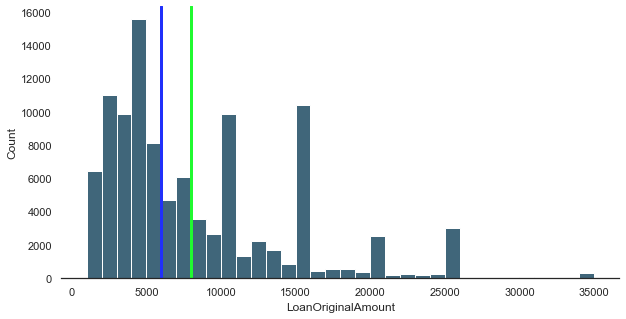

In [189]:
# Ploting Loan Original Amount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(loan_clean.LoanOriginalAmount, color=base_color, kde=False, binwidth=1000)
sns.despine(left=True)
plt.axvline(x=loan_clean.LoanOriginalAmount.mean(), color='#20fa30', linewidth=3) # Show the mean with a green virtical line
plt.axvline(x=loan_clean.LoanOriginalAmount.median(), color='#2030fa', linewidth=3); # Show the median with a blue virtical line

- Since mean exceeds the median , the distribution is expected to be right skewed, which is obvious from the histogram, other than couple of peaks. Moreover, we notice that it is quite rare for borrowers to ask for large amount of loans through prosper.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
- I'm interested in 2 variables `BorrowerAPR` and `LoanStatus`.
- TAs mentioned above the distribution of `BorrowerAPR` is roughly normal with a peak around 35% and didn't to perform any kind of transformations.
- `LoanStatus`: The most status is `Current` followd by `completed`, `Chargedoff` and ` Defaulted` and the rest is less than 400 and `Canceled` loans are almost 0. 
 
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
- When investigatin number of Loans per year we found a drop in numbers in 2009.
- The most reason for loans is 'Debt Consilidations', Most of individuals were from California state, and top occupations were (other, professional and computer programmer)

<a id='Bivariate'></a>
## Bivariate Exploration
Let's start by plotting the correlation coeffetient for the numeric variables in our data

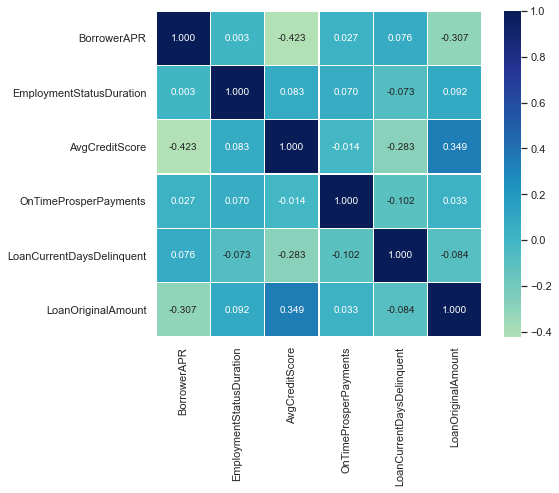

In [190]:
# Listing the numeric variables
num_cols = ['BorrowerAPR', 'ProsperScore', 'EmploymentStatusDuration', 
            'AvgCreditScore', 'OnTimeProsperPayments', 
            'LoanCurrentDaysDelinquent', 'LoanOriginalAmount']
# Heatmap Plot
plt.figure(figsize=(8, 6))
sns.heatmap(loan_clean[num_cols].corr(),
            annot=True,
            fmt='.3f',
            cmap='YlGnBu',
            center=0,
            linewidths=.5,
            square=True);

In [191]:
# Sample for Pair Grid
loan_samp = loan_clean.sample(1000)

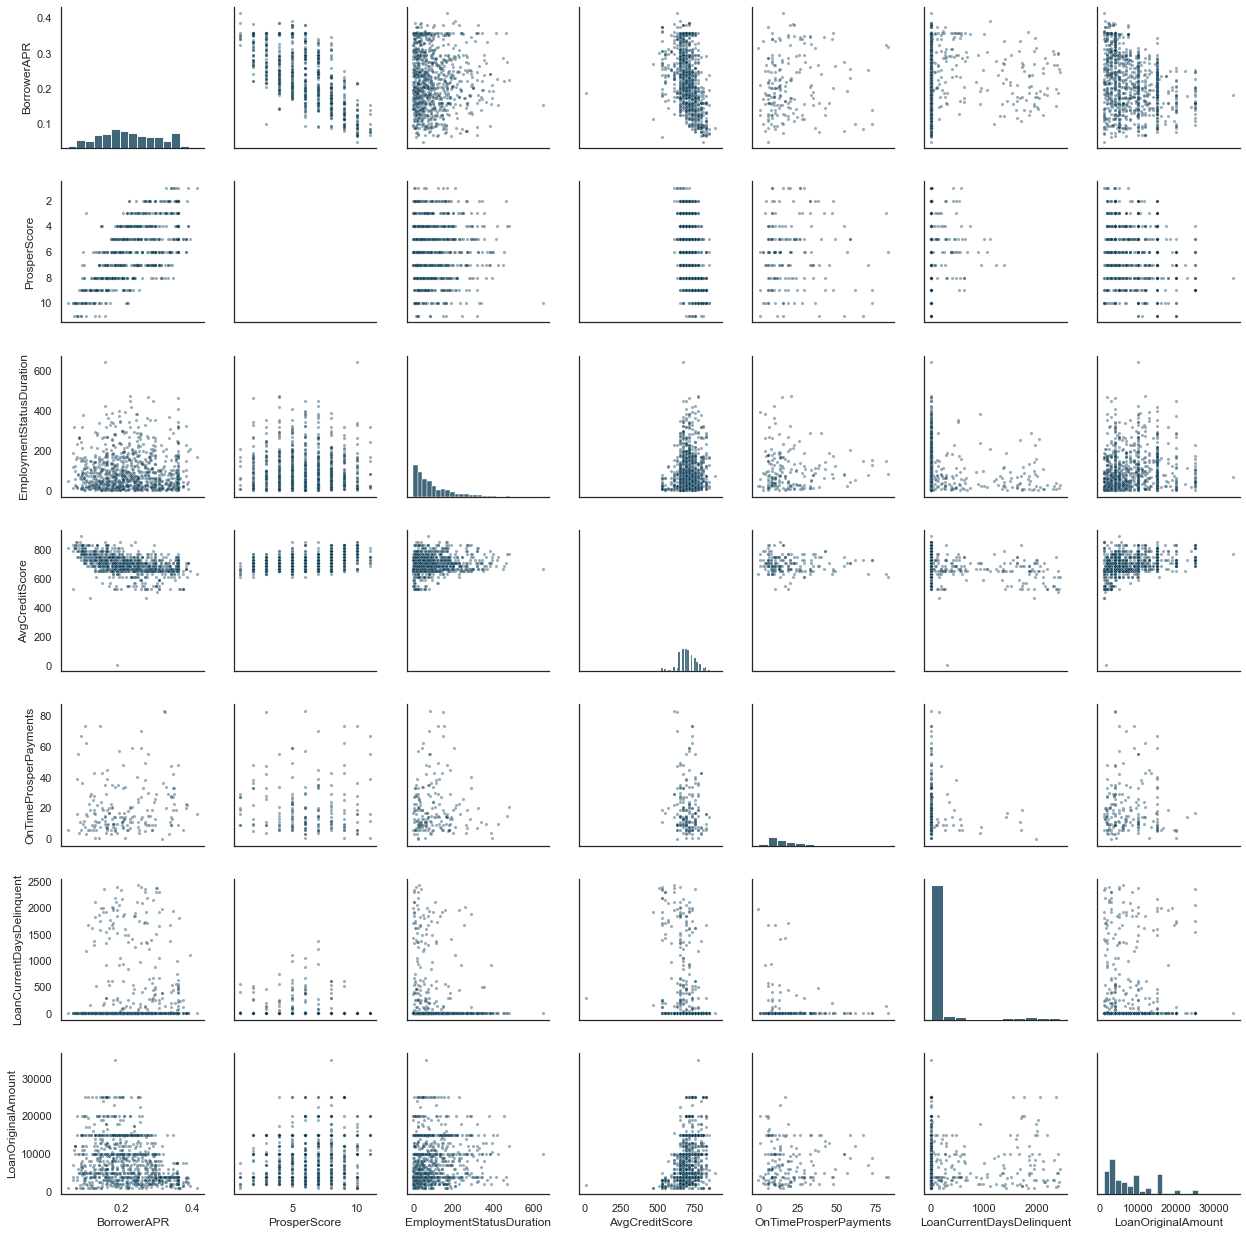

In [192]:
# Pair grid plot for numeric variables
g = sns.PairGrid(data=loan_samp, vars=num_cols)
g = g.map_diag(sns.histplot, kde=False, color=base_color)
g.map_offdiag(sns.scatterplot, color=base_color, alpha=0.4, s=10);

- As we can see here that the brrowerAPR is negatively correlated with Loan original amount, prosper score and average credit score.

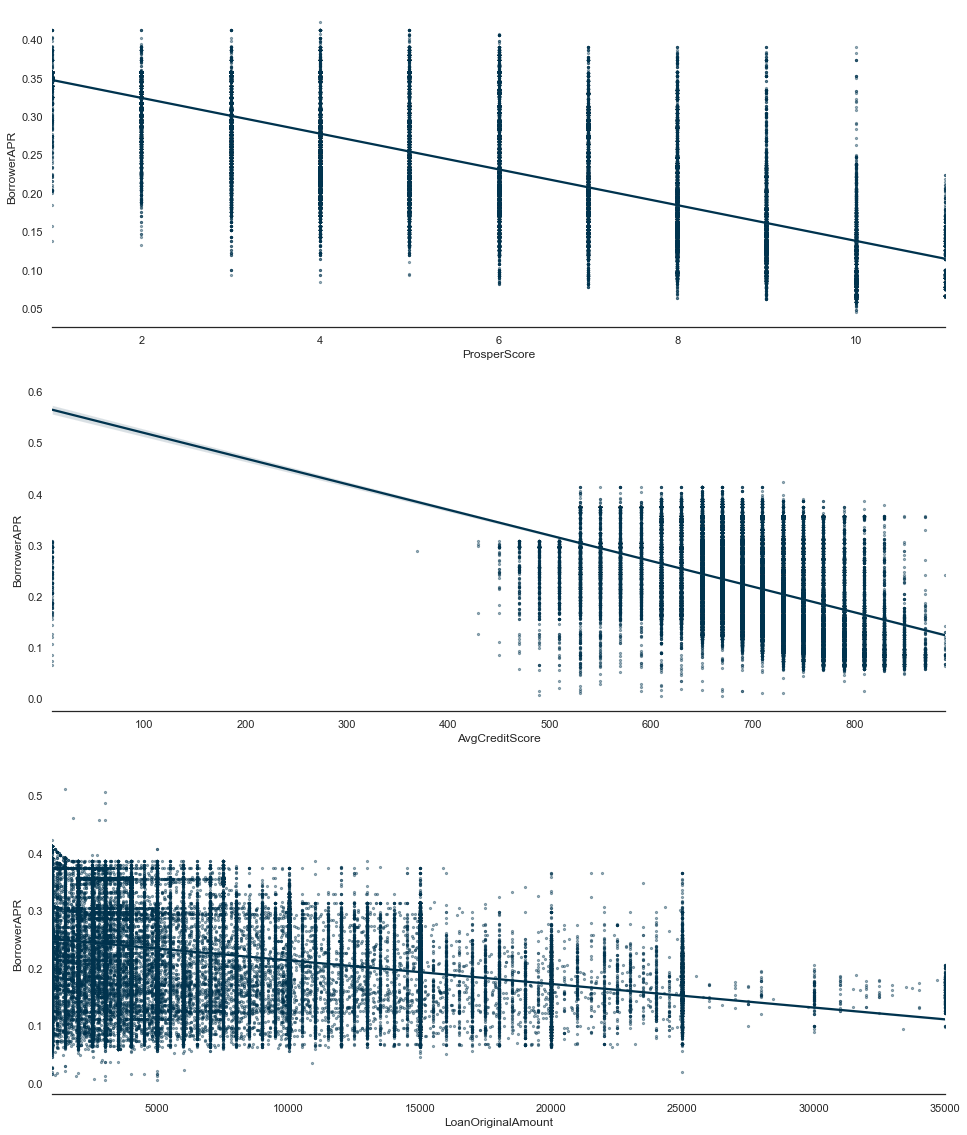

In [215]:
# List the high correlated variables with BorrowerAPR to zoom into their scatter plot
apr_high_corr = ['ProsperScore', 'AvgCreditScore', 'LoanOriginalAmount']

fig, ax = plt.subplots(figsize=(16, 20), nrows=3)

for i, var in enumerate(apr_high_corr):
    sns.regplot(data=loan_clean, x=var, y='BorrowerAPR', color=base_color, scatter_kws={'alpha':0.4, 's':5}, ax=ax[i])
    sns.despine(left=True)
    

In [194]:
loan_clean.select_dtypes(include=['category', 'bool']).describe()

,Term,LoanStatus,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange
count,103178,103178,74119,103178,97688,100137,100948,103178,103178
unique,3,12,11,21,51,67,8,2,8
top,36,Current,6,Debt Consolidation,CA,Other,Employed,True,"$25,000-49,999"
freq,80390,45933,10912,49860,13294,26302,58024,51803,29482


In [195]:
loan_clean.select_dtypes(exclude=['category', 'bool']).describe(datetime_is_numeric=True)

,ListingCreationDate,BorrowerAPR,EmploymentStatusDuration,OnTimeProsperPayments,LoanCurrentDaysDelinquent,LoanOriginalAmount,AvgCreditScore
count,103178,103178.00000,95578.00000,21008.00000,103178.00000,103178.00000,102612.00000
mean,2011-04-03 07:04:32.053993984,0.22260,94.73928,22.13880,168.75002,7965.84034,694.23512
min,2006-01-06 15:21:19.047000,0.00653,0.00000,0.00000,0.00000,1000.00000,9.50000
25%,2008-07-11 06:58:03.450999808,0.15803,25.00000,9.00000,0.00000,3500.00000,669.50000
50%,2012-03-08 06:03:38.520000,0.21470,66.00000,15.00000,0.00000,6000.00000,689.50000
75%,2013-06-13 09:04:30.018000128,0.28851,135.00000,32.00000,0.00000,10195.00000,729.50000
max,2013-12-31 22:28:19.927000,0.51229,755.00000,134.00000,2704.00000,35000.00000,889.50000
std,NaN,0.08137,93.50315,18.60742,487.27972,6075.00870,68.76704


In [199]:
cat_cols = ['Term', 'LoanStatus', 'ProsperScore', 'ListingCategory',
            'BorrowerState', 'Occupation', 'EmploymentStatus',
            'IsBorrowerHomeowner', 'IncomeRange']

In [200]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sns.boxplot(x=x, y=y, color = base_color)

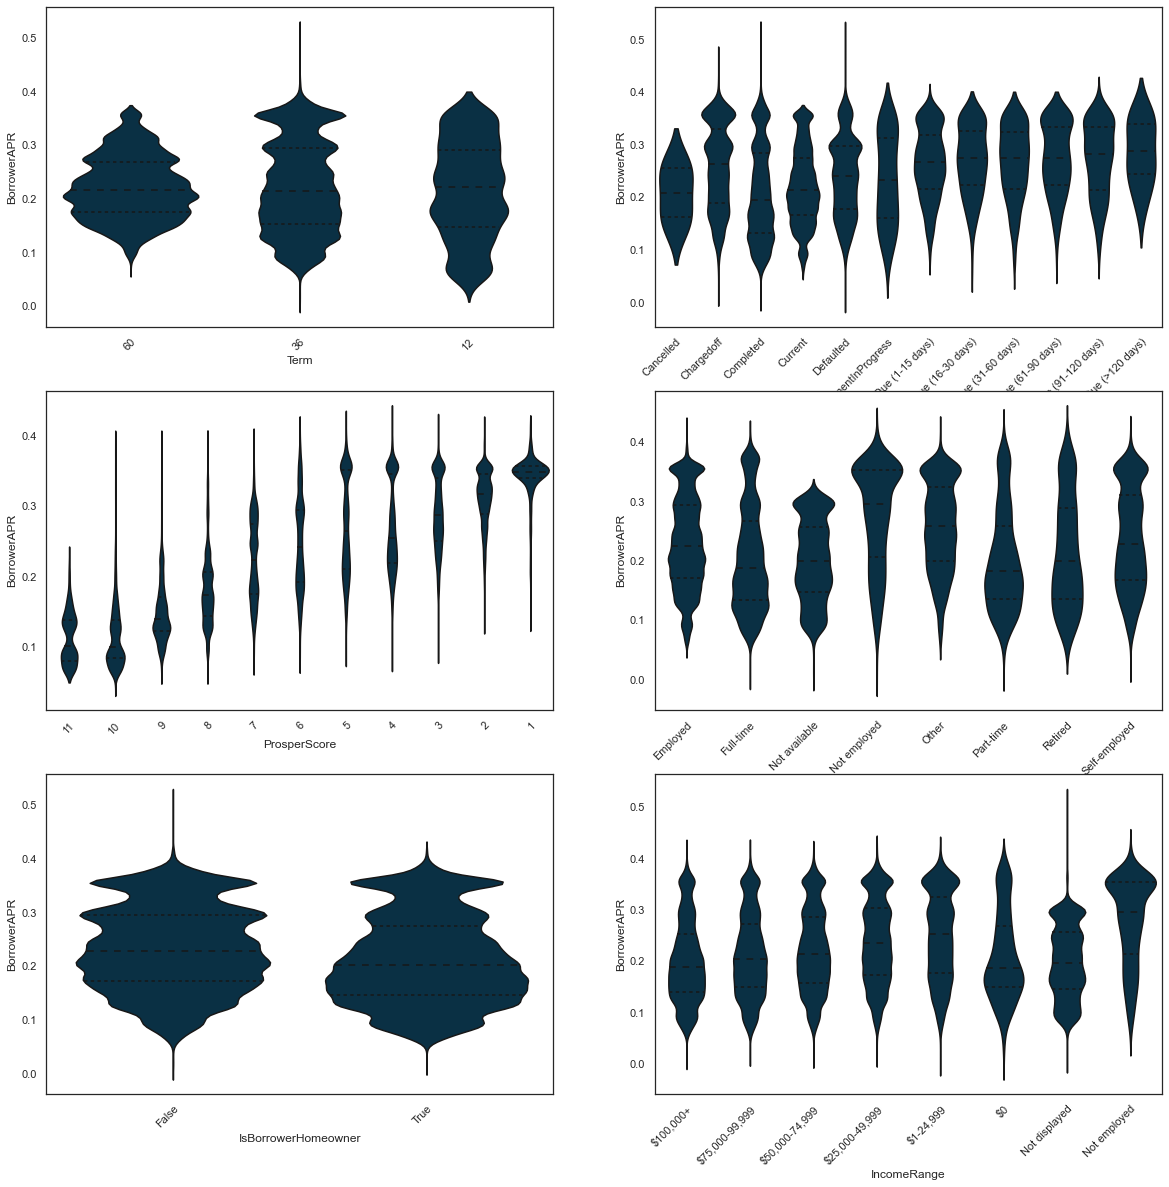

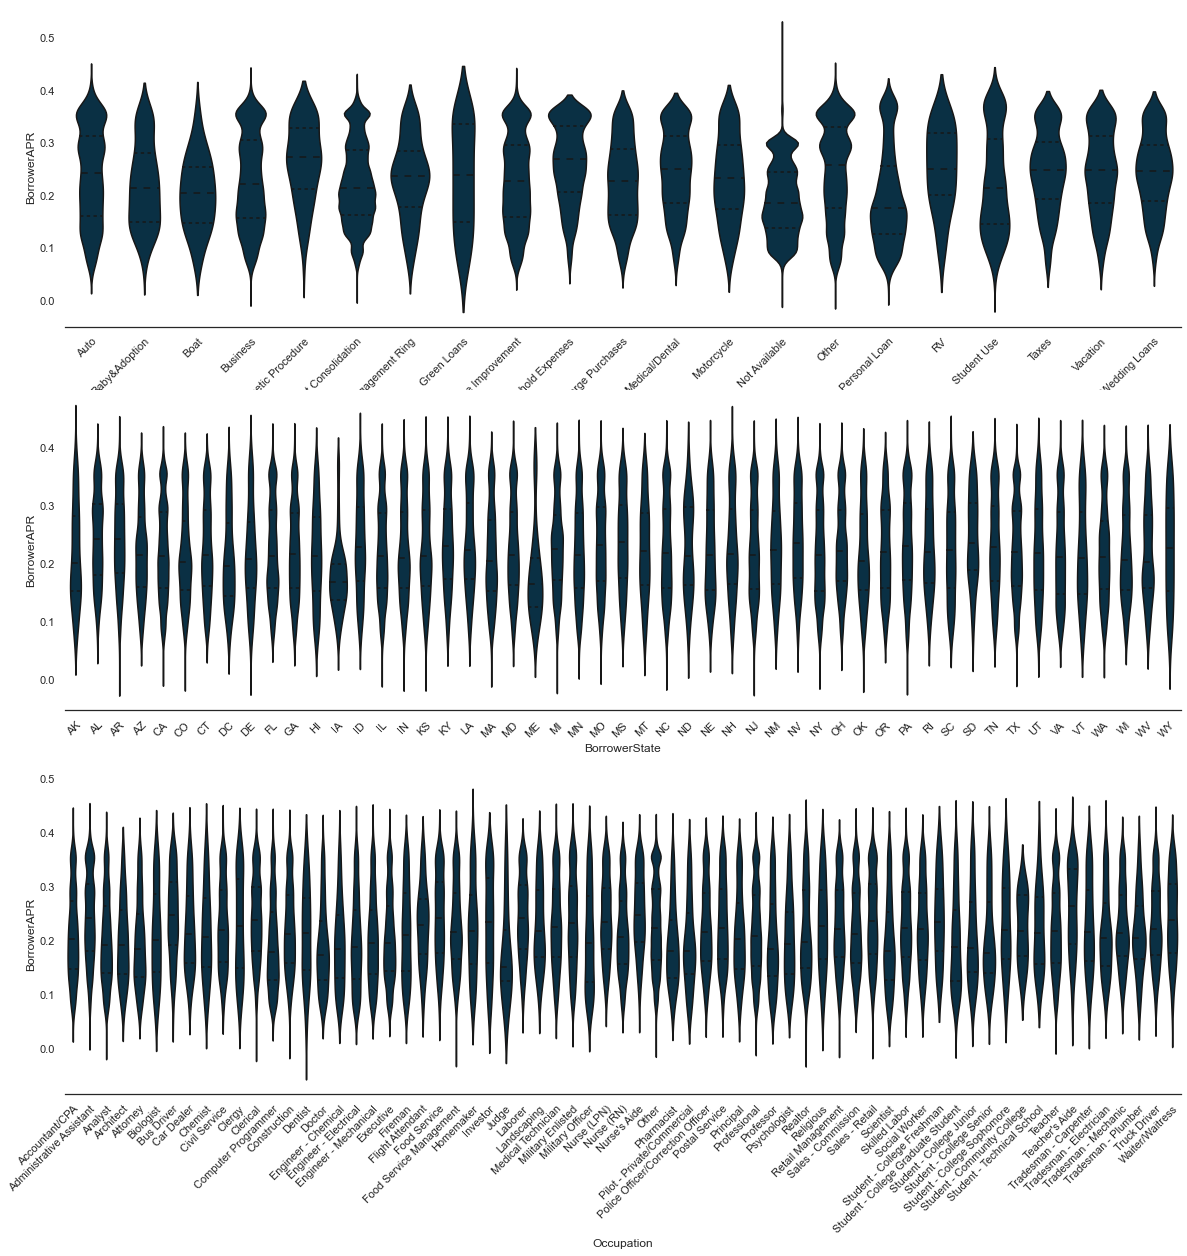

In [213]:
fig1, ax1 = plt.subplots(figsize=(20, 20), ncols=2, nrows=3)
ax1 = ax1.flatten()
fig2, ax2 = plt.subplots(figsize=(20, 20), nrows=3)

i = 0
j = 0
for var in cat_cols:
    if loan_clean[var].nunique() > 15:
        ax = ax2
        sns.violinplot(data=loan_clean, x=var, y='BorrowerAPR', color=base_color, ax=ax[i], inner='quartile')
        sns.despine(left=True)
        plt.setp(ax[i].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        i += 1
    else:
        ax = ax1
        sns.violinplot(data=loan_clean, x=var, y='BorrowerAPR', color=base_color, ax=ax[j], inner='quartile')
        sns.despine(left=True)
        plt.setp(ax[j].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        j +=1   

In [55]:
# Creating a df for map plotting
df = loan_clean[['BorrowerState', 'LoanOriginalAmount']].groupby('BorrowerState').sum().reset_index()
df.columns = ['state', 'amount']

# Setting the text for hovering over the state
df['text'] = df['state'].astype('str') + ': ' + df['amount'].apply(lambda x :f'{x:,.0f}')
df.head()

,state,amount,text
0,AK,1531721,"AK: 1,531,721"
1,AL,11150808,"AL: 11,150,808"
2,AR,5334223,"AR: 5,334,223"
3,AZ,13403979,"AZ: 13,403,979"
4,CA,114588890,"CA: 114,588,890"


In [56]:
# Setting the figure for plotly map
fig = go.Figure(data=go.Choropleth(locations=df.state, # Spatial coordinates
                                   z = df.amount.astype(float), # Data to be color-coded
                                   locationmode = 'USA-states', # set of locations match entries in `locations`
                                   text=df.state,
                                   colorscale = 'Blues',
                                   autocolorscale=False,
                                   marker_line_color='darkgray',
                                   marker_line_width=0.5,
                                   colorbar_title = "USD",
                                   colorbar_tickprefix = '$',
                                   hovertemplate = '<i>Amount</i>: $%{z:,.0f}<extra>%{text}</extra>', # Hoovering Text
                                   showlegend=False))


# Setting the layout
fig.update_layout(
    hoverlabel_align = 'right',
    title_text = 'Total original loan amount by State',
    geo_scope='usa', # limite map scope to USA
)


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

<a id='Multivariate'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!